<a href="https://colab.research.google.com/github/chupig834/Machine-Learning-Projects/blob/main/Kaggle_House_Price1/Kaggle_Beg_House_Pred_Pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [320]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [321]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [322]:
missing_percent = (train.isnull().sum() / len(train)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [323]:
threshold = 0.3
missing_ratio = train.isnull().sum() / len(train)
cols_to_drop = missing_ratio[missing_ratio > threshold].index
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [324]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageType       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
dtype: int64


In [325]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'])

quality_meassure = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']

for col in quality_meassure:
  train[col] = train[col].fillna('TA')
  test[col] = test[col].fillna('TA')

In [326]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
print(train.shape)

LotFrontage     259
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64
(1460, 75)


In [327]:
missing_values = test.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

LotFrontage     227
GarageFinish     78
GarageType       76
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
Exterior1st       1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [328]:
#Dropping Outlier
train = train.drop(index=[523, 1298])

In [329]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols =X_train.select_dtypes(include='object').columns

In [331]:
from sklearn.preprocessing import FunctionTransformer

# Custom function to add new features
def add_custom_features(df):
    df = df.copy()
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    # df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)
    return df

feature_adder = FunctionTransformer(add_custom_features)

In [332]:
# Numeric: fill missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical: fill missing with mode, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop=None))
])

In [333]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [334]:
xgb_model = XGBRegressor(
    subsample=0.8,
    reg_lambda=0.5,
    reg_alpha=0.5,
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.6,
    random_state=42)

In [335]:
xgb_pipeline = Pipeline(steps=[
    ('feature_adder', feature_adder),
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

In [336]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_adder',
                 FunctionTransformer(func=<function add_custom_features at 0x7d110cc659e0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinS...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [337]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42)

gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use same preprocessor
    ('regressor', gbr_model)
])

In [338]:
xgb_pipeline.fit(X_train, y_train)
gbr_pipeline.fit(X_train, y_train)

xgb_preds = xgb_pipeline.predict(X_val)
gbr_preds = gbr_pipeline.predict(X_val)

#without ensemble
rmse = np.sqrt(mean_squared_error(y_val, xgb_preds))
mae = mean_absolute_error(y_val, xgb_preds)
r2 = r2_score(y_val, xgb_preds)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# Weighted ensemble
ensemble_preds = 0.8 * xgb_preds + 0.2 * gbr_preds

rmse = np.sqrt(mean_squared_error(y_val, ensemble_preds))
mae = mean_absolute_error(y_val, ensemble_preds)
r2 = r2_score(y_val, ensemble_preds)

print(f"Ensemble RMSE: {rmse:.2f}")
print(f"Ensemble MAE: {mae:.2f}")
print(f"Ensemble R²: {r2:.4f}")

RMSE: 19736.50
MAE: 14417.11
R²: 0.9295
Ensemble RMSE: 19717.29
Ensemble MAE: 14466.25
Ensemble R²: 0.9296


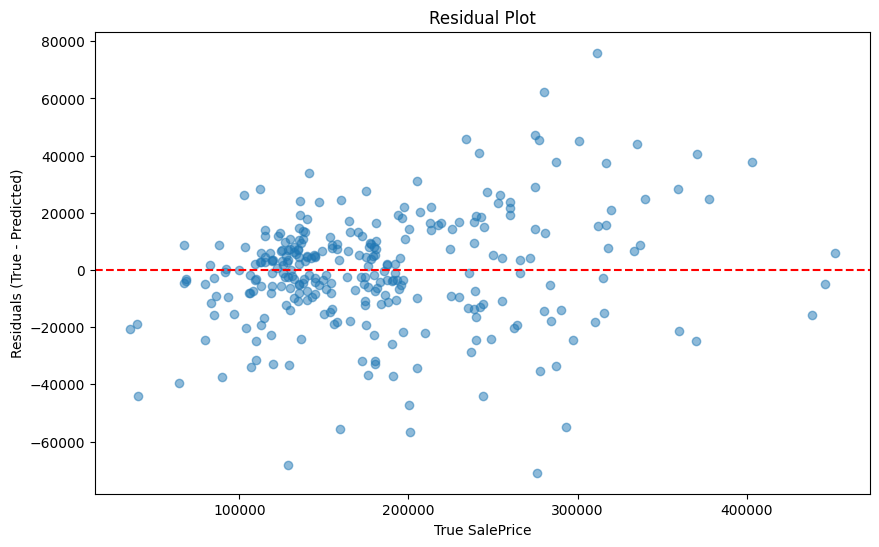

In [339]:
residuals = y_val - ensemble_preds

plt.figure(figsize=(10,6))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()

In [340]:
cat_ohe = xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot']
cat_encoded_names = cat_ohe.get_feature_names_out(categorical_cols)

# Combine in correct order based on preprocessor definition
all_feature_names = list(numeric_cols) + list(cat_encoded_names)

# Pair with importances
importances = xgb_pipeline.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                   Feature  Importance
26              GarageCars    0.121875
4              OverallQual    0.116482
175            BsmtQual_Ex    0.103211
163           ExterQual_TA    0.063534
219         KitchenQual_TA    0.049024
..                     ...         ...
235          GarageQual_Ex    0.000000
258  SaleCondition_AdjLand    0.000000
241          GarageCond_Fa    0.000000
240          GarageCond_Ex    0.000000
239          GarageQual_TA    0.000000

[263 rows x 2 columns]


Preparing Test File

In [342]:
xgb_test_preds = xgb_pipeline.predict(test)
gbr_test_preds = gbr_pipeline.predict(test)

In [343]:
# Weighted ensemble
ensemble_test_preds = 0.8 * xgb_test_preds + 0.2 * gbr_test_preds

In [344]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': ensemble_test_preds
})

In [345]:
submission.to_csv("submission.csv", index=False)